# Network Visualization of Association Rules


In the context of Market Basket Analysis, Association Rules can be described as a set of relationships between the items
that are purchased from the customers.
* Apriori Algorithm:
    * Support - The ratio of all transactions at which a specific item appears.

    * Confidence - **Conf(A, B) = Support(A, B) / Support(A)**

    * Lift - The probability of purchasing item B when item A is sold. **p(B; A) = Support(A, B) / (Support(A) * Support(B))**
    
Dataset - [E-commerce platform generated transactions](http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx)


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import os

In [7]:
pip install networkx

Note: you may need to restart the kernel to use updated packages.


In [8]:
!pip install efficient_apriori
!pip install networkx
from efficient_apriori import apriori

In [9]:
# Load data
if os.path.exists('online_retail.csv'):
    df = pd.read_csv('online_retail.csv')
else:
    df = pd.read_excel('http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx')

    df.to_csv('online_retail.csv')

df.describe(include='all')

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909.000000,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000,541908
unique,NaN,25900,4070,4223,NaN,23260,NaN,NaN,38
top,NaN,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-10-31 14:41:00,NaN,NaN,United Kingdom
freq,NaN,1114,2313,2369,NaN,1114,NaN,NaN,495478
mean,270954.000000,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,156435.797851,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,0.000000,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,135477.000000,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN
50%,270954.000000,NaN,NaN,NaN,3.000000,NaN,2.080000,15152.000000,NaN
75%,406431.000000,NaN,NaN,NaN,10.000000,NaN,4.130000,16791.000000,NaN


In [10]:
df = df[['InvoiceNo', 'Description']]
df.isnull().sum()

InvoiceNo         0
Description    1454
dtype: int64

In [11]:
df= df.dropna(subset=['Description'])
df.head()

,InvoiceNo,Description
0,536365,WHITE HANGING HEART T-LIGHT HOLDER
1,536365,WHITE METAL LANTERN
2,536365,CREAM CUPID HEARTS COAT HANGER
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE
4,536365,RED WOOLLY HOTTIE WHITE HEART.


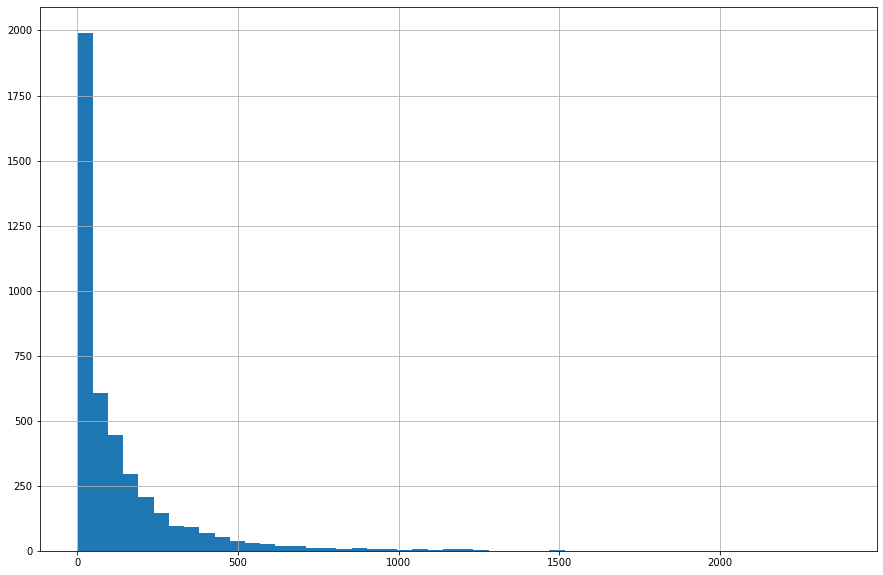

In [12]:
hist = df['Description'].value_counts().hist(bins=50, figsize = (15,10))

In [13]:
# Group sold items according their Invoice Number
grouped_transac = df.groupby('InvoiceNo').agg(list)
grouped_transac.head()

,Description
InvoiceNo,
536365,"[WHITE HANGING HEART T-LIGHT HOLDER, WHITE MET..."
536366,"[HAND WARMER UNION JACK, HAND WARMER RED POLKA..."
536367,"[ASSORTED COLOUR BIRD ORNAMENT, POPPY'S PLAYHO..."
536368,"[JAM MAKING SET WITH JARS, RED COAT RACK PARIS..."
536369,[BATH BUILDING BLOCK WORD]


In [14]:
clean_transac = lambda t_list: tuple([x.strip(' .') for x in t_list])

transactions = grouped_transac['Description'].apply(clean_transac).tolist()
print(transactions[0])

('WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN', 'CREAM CUPID HEARTS COAT HANGER', 'KNITTED UNION FLAG HOT WATER BOTTLE', 'RED WOOLLY HOTTIE WHITE HEART', 'SET 7 BABUSHKA NESTING BOXES', 'GLASS STAR FROSTED T-LIGHT HOLDER')


In [15]:
# Run apriori
%time itemsets, rules = apriori(transactions, min_support=0.007, min_confidence=0.70, verbosity=1)

Generating itemsets.
 Counting itemsets of length 1.
  Found 4210 candidate itemsets of length 1.
  Found 960 large itemsets of length 1.
 Counting itemsets of length 2.
  Found 460320 candidate itemsets of length 2.
  Found 1430 large itemsets of length 2.
 Counting itemsets of length 3.
  Found 5911 candidate itemsets of length 3.
  Found 503 large itemsets of length 3.
 Counting itemsets of length 4.
  Found 301 candidate itemsets of length 4.
  Found 75 large itemsets of length 4.
 Counting itemsets of length 5.
  Found 11 candidate itemsets of length 5.
  Found 3 large itemsets of length 5.
 Counting itemsets of length 6.
  Found 0 candidate itemsets of length 6.
Itemset generation terminated.

Generating rules from itemsets.
 Generating rules of size 2.
 Generating rules of size 3.
 Generating rules of size 4.
 Generating rules of size 5.
Rule generation terminated.

CPU times: user 3.63 s, sys: 45.8 ms, total: 3.68 s
Wall time: 3.68 s


In [16]:
# Print top 10 rules with highest confidence
for rule in sorted(rules, key=lambda rule: rule.confidence)[-10:]:
  print(rule)

{HERB MARKER CHIVES, HERB MARKER ROSEMARY} -> {HERB MARKER PARSLEY} (conf: 0.968, supp: 0.008, lift: 99.054, conv: 31.357)
{HERB MARKER CHIVES, HERB MARKER THYME} -> {HERB MARKER PARSLEY} (conf: 0.968, supp: 0.008, lift: 99.054, conv: 31.357)
{HERB MARKER CHIVES, HERB MARKER MINT, HERB MARKER THYME} -> {HERB MARKER ROSEMARY} (conf: 0.972, supp: 0.007, lift: 98.570, conv: 35.051)
{HERB MARKER BASIL, HERB MARKER MINT, HERB MARKER PARSLEY, HERB MARKER THYME} -> {HERB MARKER ROSEMARY} (conf: 0.972, supp: 0.007, lift: 98.586, conv: 35.249)
{HERB MARKER CHIVES, HERB MARKER PARSLEY, HERB MARKER THYME} -> {HERB MARKER ROSEMARY} (conf: 0.973, supp: 0.007, lift: 98.679, conv: 36.437)
{HERB MARKER CHIVES, HERB MARKER PARSLEY, HERB MARKER ROSEMARY} -> {HERB MARKER THYME} (conf: 0.973, supp: 0.007, lift: 99.923, conv: 36.442)
{BEADED CRYSTAL HEART PINK ON STICK} -> {DOTCOM POSTAGE} (conf: 0.976, supp: 0.008, lift: 33.643, conv: 40.005)
{HERB MARKER CHIVES, HERB MARKER ROSEMARY, HERB MARKER THYME} -

In [17]:
# Construct the Network/Graph
network = nx.DiGraph()
all_rules = []
for n, rule in enumerate(rules[-100:]):
    # Add rule node
    rule_label = "rule {}".format(n)
    all_rules.append(rule_label)
    network.add_node(rule_label, lift=rule.lift)
    
    # Add nodes/items affecting the rule (lhs)
    network.add_edges_from([(item, rule_label) for item in rule.lhs])
    # Add nodes/items that are the outcome of the rule (rhs)
    network.add_edges_from([(rule_label, item) for item in rule.rhs])


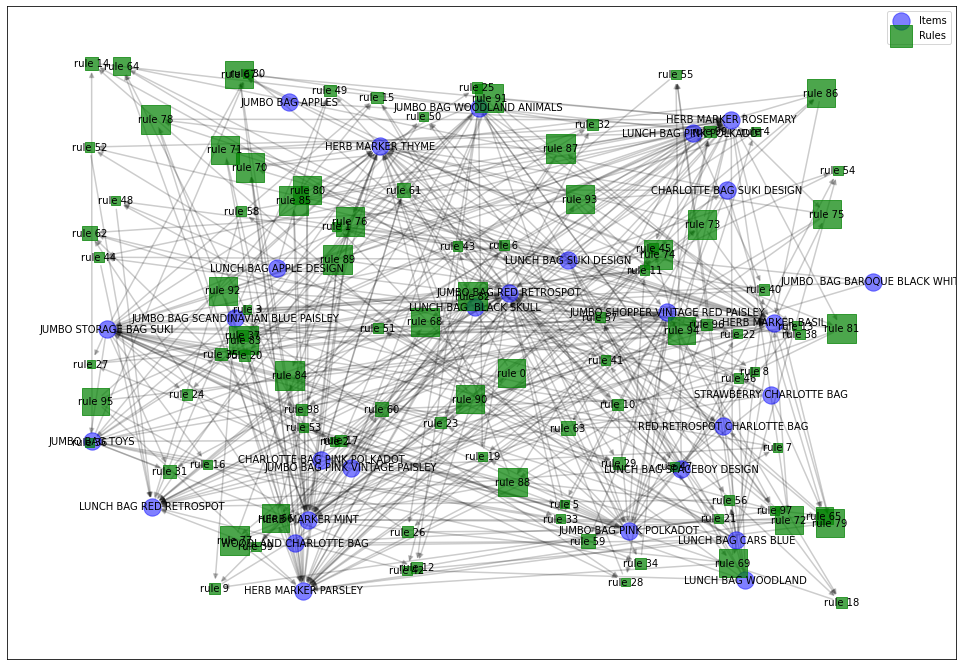

In [18]:
# Define matplotlib.pyplot axes(canvas)
_, ax = plt.subplots(figsize=(17, 12))

# nx.draw_spring(network, ax=ax)
pos = nx.random_layout(network)

# Draw edges
edges = nx.draw_networkx_edges(network, pos, alpha=0.2, width=1.5)

# Draw item nodes
nx.draw_networkx_nodes(network, 
                       pos=pos, 
                       ax=ax,
                       node_color='b',
                       alpha=0.5,
                       label='Items',
                       nodelist=[node for node in network.nodes() if node not in all_rules])

# Draw rule nodes
nx.draw_networkx_nodes(network, 
                       pos=pos, 
                       ax=ax,
                       node_color='g',
                       alpha=0.7,
                       node_shape='s',
                       label='Rules',
                       nodelist=[node for node in all_rules],
                       node_size=[8*network.nodes[rule]['lift'] for rule in all_rules])

# Draw node labels
labels = nx.draw_networkx_labels(network,pos=pos, ax=ax, font_size=10)

legend = ax.legend()

In [19]:
print('Thank you')

Thank you
